<a href="https://colab.research.google.com/github/Direnzi002/Airline_Passenger_Satisfaction/blob/main/Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados
**DataFrame**: Kaggle - Airline Passenger Satisfaction

**Objetivo**: Analisar o impacto dos atrasos na satisfação dos passageiros.

## **Ambiente**

In [ ]:
# Instalar bibliotecas necessárias (executar apenas se for necessário)
# !pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

## **Carregamento e Visualizacao inicial dos dados**

In [ ]:
# Site de onde foi tirado o dataset:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


# Fazendo upload do dataset
upload = files.upload()
df = pd.read_csv('/content/train.csv')

Saving train.csv to train.csv


In [ ]:
# Visualizacao dos primeiros 5 registros do dataset
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Traducao de cada coluna em portugues**


In [ ]:
# Trazendo mas informacoes sobre o dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [ ]:
# Dicionário de tradução dos nomes de colunas
colunas_traduzidas = {
    'Unnamed: 0': 'Indice',
    'id': 'ID Passageiro',
    'Gender': 'Genero',
    'Customer Type': 'Tipo de Cliente',
    'Age': 'Idade',
    'Type of Travel': 'Tipo de Viagem',
    'Class': 'Classe da Passagem',
    'Flight Distance': 'Distancia do Voo',
    'Inflight wifi service': 'Wi-Fi a Bordo',
    'Departure/Arrival time convenient': 'Horario Conveniente de Partida/Chegada',
    'Ease of Online booking': 'Facilidade na Reserva Online',
    'Gate location': 'Localizacao do Portao',
    'Food and drink': 'Comida e Bebida',
    'Online boarding': 'Embarque Online',
    'Seat comfort': 'Conforto do Assento',
    'Inflight entertainment': 'Entretenimento a Bordo',
    'On-board service': 'Servico a Bordo',
    'Leg room service': 'Espaco para as Pernas',
    'Baggage handling': 'Manuseio de Bagagem',
    'Checkin service': 'Servico de Check-in',
    'Inflight service': 'Servico Durante o Voo',
    'Cleanliness': 'Limpeza',
    'Departure Delay in Minutes': 'Atraso na Partida (min)',
    'Arrival Delay in Minutes': 'Atraso na Chegada (min)',
    'satisfaction': 'Satisfacao'
}

# Aplicando a renomeação no DataFrame
df.rename(columns=colunas_traduzidas, inplace=True)

# Verificando se as colunas foram atualizadas
df.columns


Index(['Indice', 'ID Passageiro', 'Genero', 'Tipo de Cliente', 'Idade',
       'Tipo de Viagem', 'Classe da Passagem', 'Distancia do Voo',
       'Wi-Fi a Bordo', 'Horario Conveniente de Partida/Chegada',
       'Facilidade na Reserva Online', 'Localizacao do Portao',
       'Comida e Bebida', 'Embarque Online', 'Conforto do Assento',
       'Entretenimento a Bordo', 'Servico a Bordo', 'Espaco para as Pernas',
       'Manuseio de Bagagem', 'Servico de Check-in', 'Servico Durante o Voo',
       'Limpeza', 'Atraso na Partida (min)', 'Atraso na Chegada (min)',
       'Satisfacao'],
      dtype='object')

**Significado de cada coluna**
Gênero: Gênero dos passageiros (Feminino, Masculino)

Tipo de cliente: O tipo de cliente (cliente fiel, cliente desleal)

Idade: A idade real dos passageiros

Tipo de viagem: Objetivo do voo dos passageiros (Viagem pessoal, Viagem de negócios)

Classe: Classe de viagem no avião dos passageiros (Business, Eco, Eco Plus)

Distância de voo: A distância de voo desta viagem

Serviço de Wi-Fi a bordo: Nível de satisfação do serviço de Wi-Fi a bordo (0: Não aplicável; 1-5)

Horário de partida/chegada conveniente: Nível de satisfação com o horário de partida/chegada conveniente

Facilidade de reserva online: Nível de satisfação com a reserva online

Localização do portão: Nível de satisfação da localização do portão

Comida e bebida: Nível de satisfação com comida e bebida

Embarque online: Nível de satisfação do embarque online

Conforto do assento: Nível de satisfação com o conforto do assento

Entretenimento a bordo: Nível de satisfação com o entretenimento a bordo

Serviço de bordo: Nível de satisfação do serviço de bordo

Serviço de espaço para as pernas: Nível de satisfação do serviço de espaço para as pernas

Manuseio de bagagem: Nível de satisfação com o manuseio de bagagem

Serviço de check-in: Nível de satisfação do serviço de check-in

Serviço de bordo: Nível de satisfação do serviço de bordo

Limpeza: Nível de satisfação com a limpeza

Atraso na partida em minutos: minutos de atraso na partida

Atraso na chegada em minutos: minutos de atraso na chegada

Satisfação: Nível de satisfação da companhia aérea (satisfação, neutro ou insatisfação)

## **Limpeza e tratamento de dados**

In [ ]:
# Lista de colunas
colunas = [
    'Indice', 'ID Passageiro', 'Genero', 'Tipo de Cliente', 'Idade', 'Tipo de Viagem',
    'Classe da Passagem', 'Distancia do Voo', 'Wi-Fi a Bordo',
    'Horario Conveniente de Partida/Chegada', 'Facilidade na Reserva Online',
    'Localizacao do Portao', 'Comida e Bebida', 'Embarque Online', 'Conforto do Assento',
    'Entretenimento a Bordo', 'Servico a Bordo', 'Espaco para as Pernas',
    'Manuseio de Bagagem', 'Servico de Check-in', 'Servico Durante o Voo',
    'Limpeza', 'Atraso na Partida (min)', 'Atraso na Chegada (min)', 'Satisfacao'
]

# Gerar um DataFrame com os valores nulos
nulos_df = df[colunas].isnull().sum().reset_index()
nulos_df.columns = ['Coluna', 'Valores Nulos']
print(nulos_df)

                                    Coluna  Valores Nulos
0                                   Indice              0
1                            ID Passageiro              0
2                                   Genero              0
3                          Tipo de Cliente              0
4                                    Idade              0
5                           Tipo de Viagem              0
6                       Classe da Passagem              0
7                         Distancia do Voo              0
8                            Wi-Fi a Bordo              0
9   Horario Conveniente de Partida/Chegada              0
10            Facilidade na Reserva Online              0
11                   Localizacao do Portao              0
12                         Comida e Bebida              0
13                         Embarque Online              0
14                     Conforto do Assento              0
15                  Entretenimento a Bordo              0
16            

### **Tratando nulos**
Tratando os nulos da coluna Arrival Delay in Minutes (unica coluna com valores nulos)

"Optamos por preencher os valores nulos da variável Arrival Delay in Minutes com a mediana dos dados, considerando a baixa quantidade de valores ausentes (0,3%) e o risco de distorção por outliers em medidas de tendência central como a média."

In [ ]:
# Trocando valores nulos pela mediana da coluna
mediana_ANC = df['Atraso na Chegada (min)'].median()
df['Atraso na Chegada (min)'].fillna(mediana_ANC, inplace = True)

# Pritando para confirmar se nao ha mais valores nulos
print(df.isnull().sum())

Indice                                    0
ID Passageiro                             0
Genero                                    0
Tipo de Cliente                           0
Idade                                     0
Tipo de Viagem                            0
Classe da Passagem                        0
Distancia do Voo                          0
Wi-Fi a Bordo                             0
Horario Conveniente de Partida/Chegada    0
Facilidade na Reserva Online              0
Localizacao do Portao                     0
Comida e Bebida                           0
Embarque Online                           0
Conforto do Assento                       0
Entretenimento a Bordo                    0
Servico a Bordo                           0
Espaco para as Pernas                     0
Manuseio de Bagagem                       0
Servico de Check-in                       0
Servico Durante o Voo                     0
Limpeza                                   0
Atraso na Partida (min)         

/tmp/ipython-input-9-223165249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Atraso na Chegada (min)'].fillna(mediana_ANC, inplace = True)


### **Tratando dados errados**

In [ ]:
# Consultando as colunas para saber se os seus tipos estao corretos
for coluna in colunas:
  tipo = df[coluna].dtype
  if tipo != 'int64':
    print(f"A coluna '{coluna}'tem o tipo {tipo} ")

A coluna 'Genero'tem o tipo object 
A coluna 'Tipo de Cliente'tem o tipo object 
A coluna 'Tipo de Viagem'tem o tipo object 
A coluna 'Classe da Passagem'tem o tipo object 
A coluna 'Atraso na Chegada (min)'tem o tipo float64 
A coluna 'Satisfacao'tem o tipo object 


In [ ]:
# Coferindo se todas as colunas contem apenas 1 formato de dados em suas colunas
for coluna in colunas:
    tipos = df[coluna].map(type).value_counts()
    if len(tipos) > 1:
        print(f"\nColuna: {coluna}")
        print(tipos)
        # Caso nao printe nada, todas as colunas nao contem mais de um formato de dado

In [ ]:
# Trazendo todos os valores das colunas STR(string)
for coluna in ['Genero', 'Tipo de Cliente', 'Tipo de Viagem', 'Classe da Passagem', 'Satisfacao']:
    print(f"\n{coluna}:")
    print(df[coluna].unique())


Genero:
['Male' 'Female']

Tipo de Cliente:
['Loyal Customer' 'disloyal Customer']

Tipo de Viagem:
['Personal Travel' 'Business travel']

Classe da Passagem:
['Eco Plus' 'Business' 'Eco']

Satisfacao:
['neutral or dissatisfied' 'satisfied']


##**Visualização Analítica e Interpretação de Resultados**

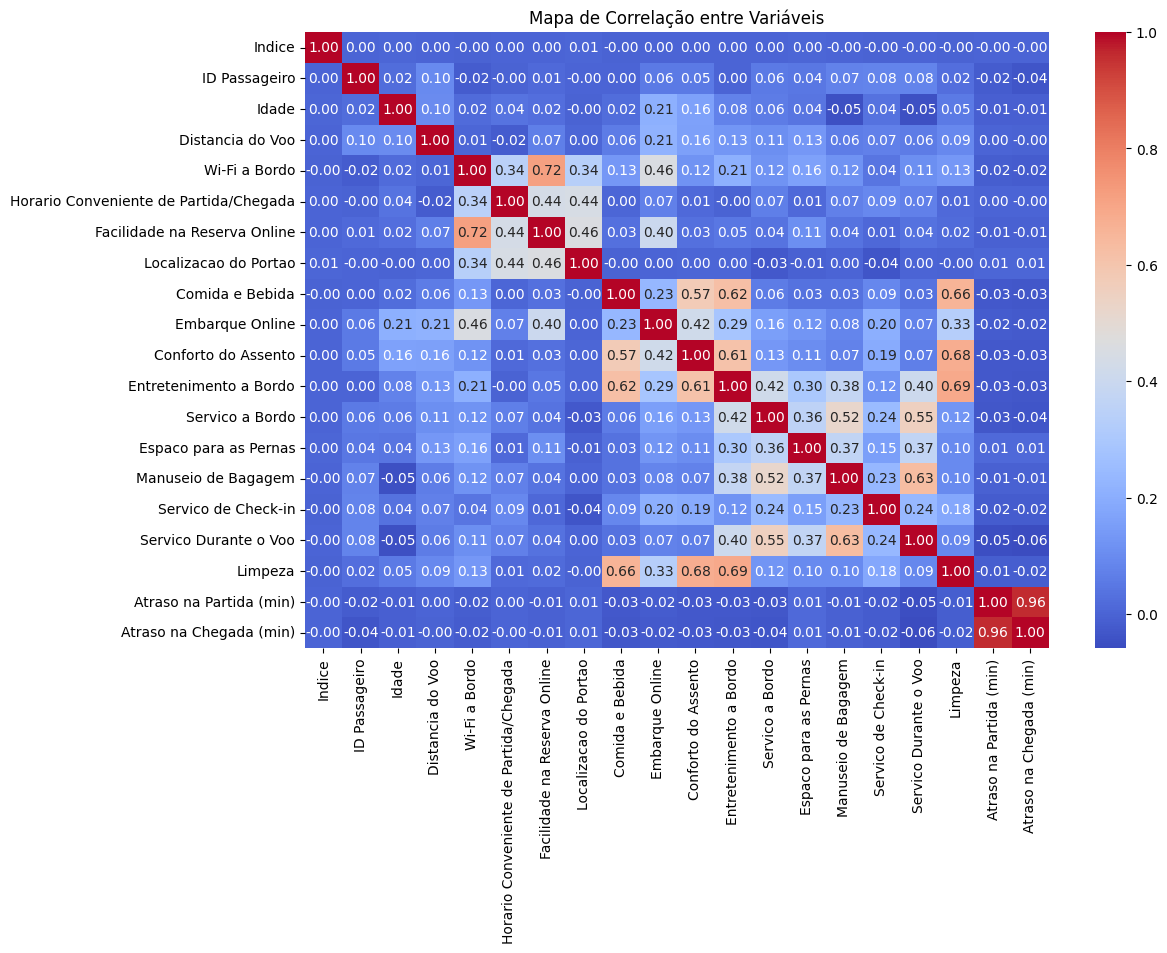

In [ ]:
# Correlação entre as variáveis numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de Correlação entre Variáveis")
plt.show()

### **OBS sobre o grafico de correlacao a cima**
::
**Correlação alta entre:**

1.   Atraso na Partida (min) e Atraso na Chegada (min) -> 0.96 ===== *Interpretacao: atrasos na decolagem geralmente impactam a chegada.*


**Correlações relevantes entre:**


1.   Servico Durante o Voo e Servico a Bordo -> 0.55 ===== ✅*Interpretacao: Existe uma correlação significativa entre os serviços gerais e o atendimento a bordo, o que sugere que a experiência global é percebida como um conjunto coeso pelos passageiros.*
2.   Servico Durante o Voo e Entretenimento a Bordo -> 0.42 ===== ✅*Interpretacao: O entretenimento está positivamente associado à percepção do serviço a bordo, com maior presença possivelmente em classes superiores. No entanto, como a correlação é moderada, trata-se de um diferencial percebido, não um fator essencial.*
3.   Conforto do Assento e Espaco para as Pernas -> 0.36 ===== ✅*Interpretacao: O espaço para as pernas contribui diretamente para a percepção de conforto no assento, evidenciando a importância de fatores ergonômicos para a satisfação do passageiro.*
4.   Conforto do Assento e Entretenimento a Bordo  -> 0.32 ===== ✅*Interpretacao: Apesar de o conforto estar mais associado a aspectos físicos, o entretenimento a bordo também contribui positivamente para uma experiência mais agradável e menos monótona, complementando a sensação de bem-estar.*

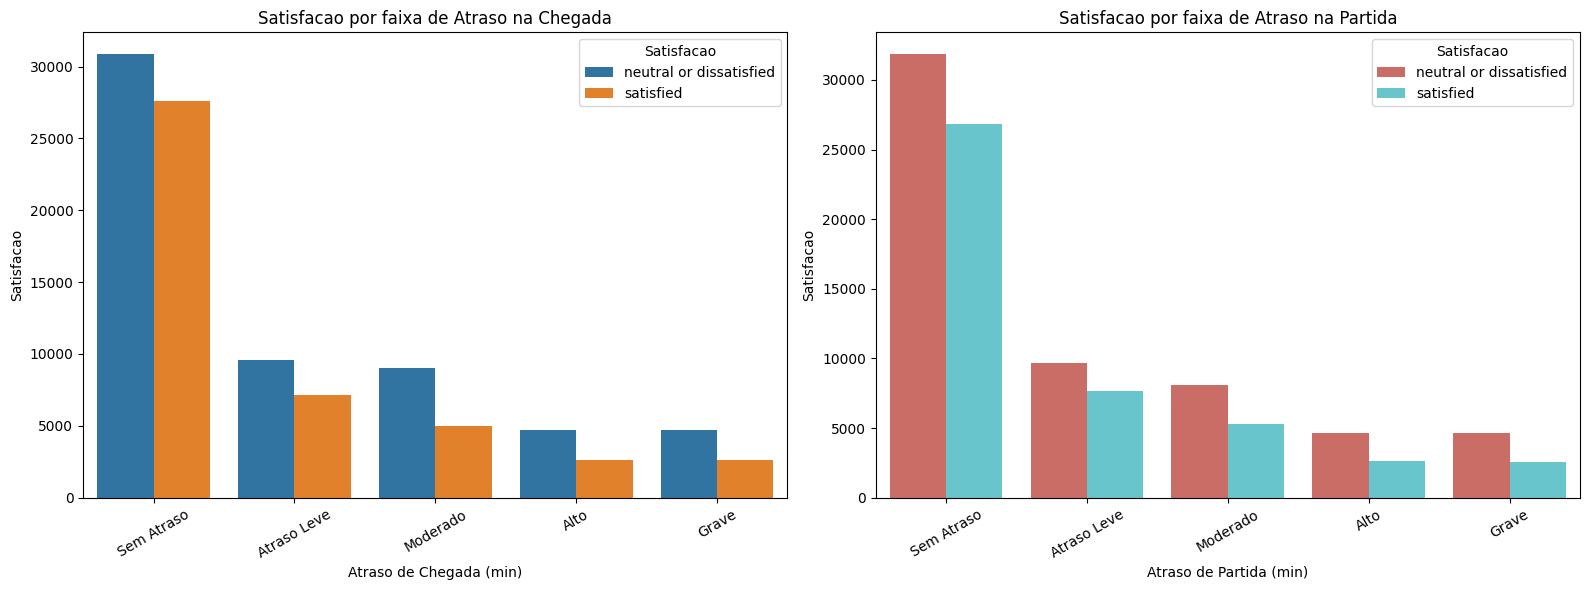

In [ ]:
df['Faixa_atraso_Chegada'] = pd.cut(
    df['Atraso na Chegada (min)'],
    bins = [-1, 0, 10, 30, 60, df['Atraso na Chegada (min)'].max()],
    labels = ['Sem Atraso', 'Atraso Leve', 'Moderado', 'Alto', 'Grave']
)

df['Faixa_atraso_Partida'] = pd.cut(
    df['Atraso na Partida (min)'],
    bins = [-1, 0, 10, 30, 60, df['Atraso na Partida (min)'].max()],
    labels = ['Sem Atraso', 'Atraso Leve', 'Moderado', 'Alto', 'Grave']
)



fig, axes = plt.subplots(1, 2, figsize = (16, 6), sharex = True)

sns.countplot(data = df, x = 'Faixa_atraso_Chegada', hue = 'Satisfacao',
              ax = axes[0], palette = 'tab10')

sns.countplot(data = df, x = 'Faixa_atraso_Partida', hue = 'Satisfacao',
              ax = axes[1], palette = 'hls')


axes[0].set_title('Satisfacao por faixa de Atraso na Chegada')
axes[0].set_xlabel('Atraso de Chegada (min)')
axes[0].set_ylabel('Satisfacao')
axes[0].tick_params(axis = 'x', rotation = 30)

axes[1].set_title('Satisfacao por faixa de Atraso na Partida')
axes[1].set_xlabel('Atraso de Partida (min)')
axes[1].set_ylabel('Satisfacao')
axes[1].tick_params(axis = 'x', rotation = 30)

plt.tight_layout()
plt.show()

Conforme e mostrado nos graficos a cima, o Nivel de satisfacao entre o atraso da chegada e da partida, estao bem similares. Um padrao percepitivel, e que mesmo sem atrasos no voo, ou com muito atraso, a maioria das pessoas se mantem neutra ou negativa em relacao a satisfacao.
Alguns pontos merecem destaque:
- "Sem Atraso" na Partida apresenta uma taxa de insatisfação ligeiramente superior àquela observada na Chegada. Isso pode ser atribuído a fatores externos à pontualidade, como desconforto nos assentos, atendimento insatisfatório ainda em solo ou até mesmo questões pessoais dos passageiros, que já iniciam a viagem com predisposição negativa.

- A faixa "Atraso Leve" na Chegada também apresenta uma leve elevação na insatisfação em comparação à Partida. Tal percepção pode estar relacionada à experiência a bordo não corresponder às expectativas durante o voo, o que reforça a importância da qualidade do serviço durante o trajeto.

- A faixa "Moderado" (entre 10 e 30 min) apresenta uma diferença visual clara entre satisfeitos e insatisfeitos mais acentuada no atraso da chegada. Isso indica que o momento da chegada impacta mais diretamente a percepção do cliente, possivelmente por comprometer compromissos, conexões ou expectativas.

- Tanto no atraso "Alto" quanto "Grave" de ambas as situacoes, apresentam uma grande similariedade entre os dados de satisfacao. Isso possivelmente se da pois independente da situacao, apos muito tempo, como 1 hora, a grande maioria ja nao tem paciencia para continuar a viagem.

- Em ambas as situações, as faixas de "Atraso Alto" e "Atraso Grave" apresentam comportamento semelhante em termos de distribuição de satisfação. Isso reforça a ideia de que, a partir de certo limite de atraso (acima de 60 minutos, por exemplo), a tolerância do passageiro se esgota, resultando em uma percepção predominantemente negativa da experiência, independentemente do momento do voo.

----------------------------------------

**Ponto positivo a se destacar:** Um ponto positivo a ser ressaltado é que, mesmo diante de atrasos classificados como "Altos" ou "Graves", ainda é possível observar uma parcela de passageiros que se declara satisfeita. Esse comportamento, embora minoritário, pode indicar que a empresa conseguiu mitigar parcialmente os efeitos negativos do atraso, oferecendo uma experiência compensatória — como conforto elevado, atendimento personalizado ou suporte diferenciado.

É razoável supor que essa fatia de passageiros satisfeitos esteja, em sua maioria, associada a classes superiores de serviço, como a Primeira Classe ou Classe Executiva, onde os impactos do atraso são minimizados por benefícios como assentos mais confortáveis, serviços exclusivos e suporte prioritário. Isso reforça a ideia de que, em situações adversas, a qualidade do atendimento pode desempenhar um papel crucial na manutenção da percepção positiva por parte do cliente.

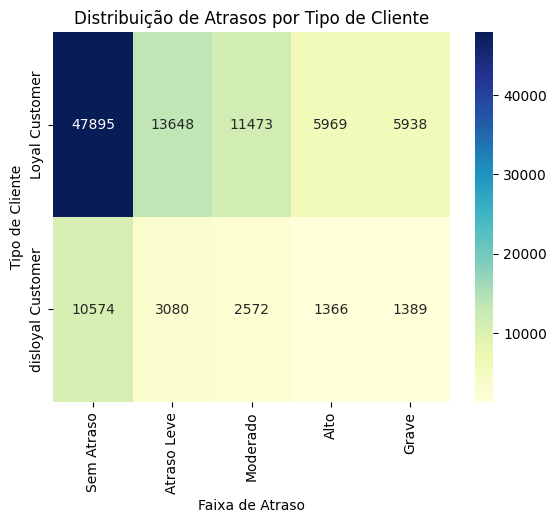

In [ ]:
heatmap_data = pd.crosstab(df['Tipo de Cliente'], df['Faixa_atraso_Chegada'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribuição de Atrasos por Tipo de Cliente')
plt.xlabel('Faixa de Atraso')
plt.ylabel('Tipo de Cliente')
plt.show()

**Loyal Customer = Cliente fiel**

**Disloyal Customer = Cliente desleal**

Este grafico consegue nos trazer 2 informacoes importantes:
- A maioria dos passageiros registrados são classificados como “Loyal Customers” (Clientes Fiéis). Isso indica que a base da companhia aérea é composta, em grande parte, por passageiros recorrentes, o que pode estar relacionado a programas de fidelidade, frequência de viagens a trabalho ou preferência consolidada pela companhia.

- O gráfico também evidencia uma discrepância significativa entre o volume de voos sem atraso e os voos com atraso, para ambos os perfis de cliente. Nota-se que a categoria “Sem Atraso” concentra o maior número absoluto de registros, enquanto as faixas "Alto" e "Grave" apresentam frequência consideravelmente menor. Essa distribuição reforça o padrão já observado em análises anteriores: a maioria dos voos ocorre dentro do horário previsto, embora as situações de atraso — mesmo em menor volume — apresentem maior impacto na satisfação do passageiro.

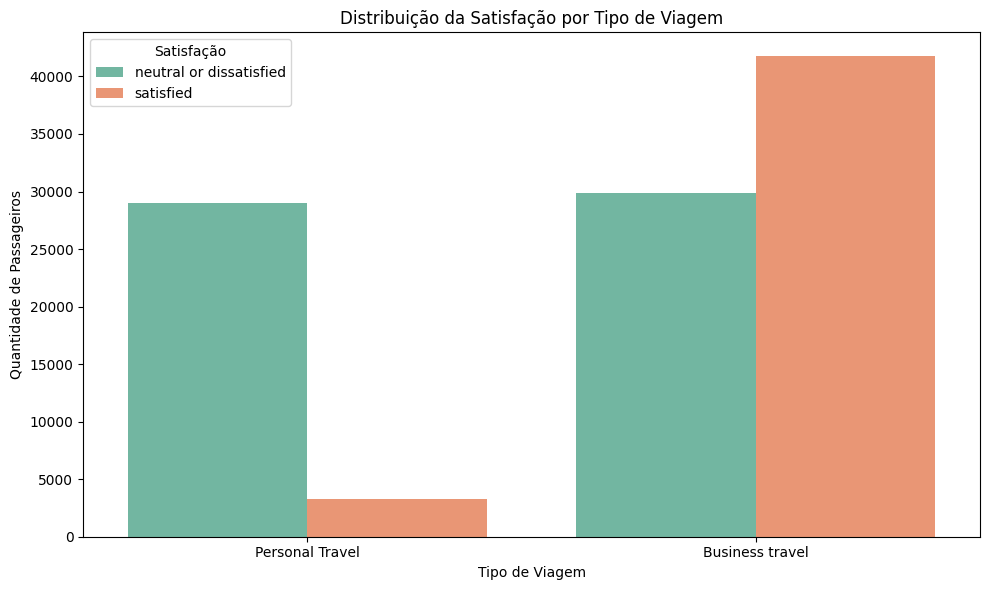

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Tipo de Viagem', hue = 'Satisfacao', palette = 'Set2')
plt.title('Distribuição da Satisfação por Tipo de Viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Satisfação')
plt.tight_layout()
plt.show()

O gráfico revela uma tendência clara: passageiros que viajam a negócios (Business) apresentam níveis significativamente mais altos de satisfação, quando comparados aos que viajam por motivos pessoais.

Essa diferença pode ser atribuída a diversos fatores, como:

Maior frequência de passageiros de classe executiva em viagens de negócios,

Benefícios associados a programas corporativos,

Atendimento diferenciado a esse perfil de cliente.

Em contrapartida, passageiros que realizam viagens de caráter pessoal (Personal) concentram a maior parte dos registros neutros ou insatisfeitos. Esse comportamento pode indicar dificuldades operacionais, ausência de benefícios adicionais ou expectativa não atendida por parte desse público.

Esse contraste reforça a hipótese de que o tratamento e os serviços ofertados durante o voo variam conforme o perfil e o propósito da viagem, impactando diretamente a percepção final da experiência aérea.

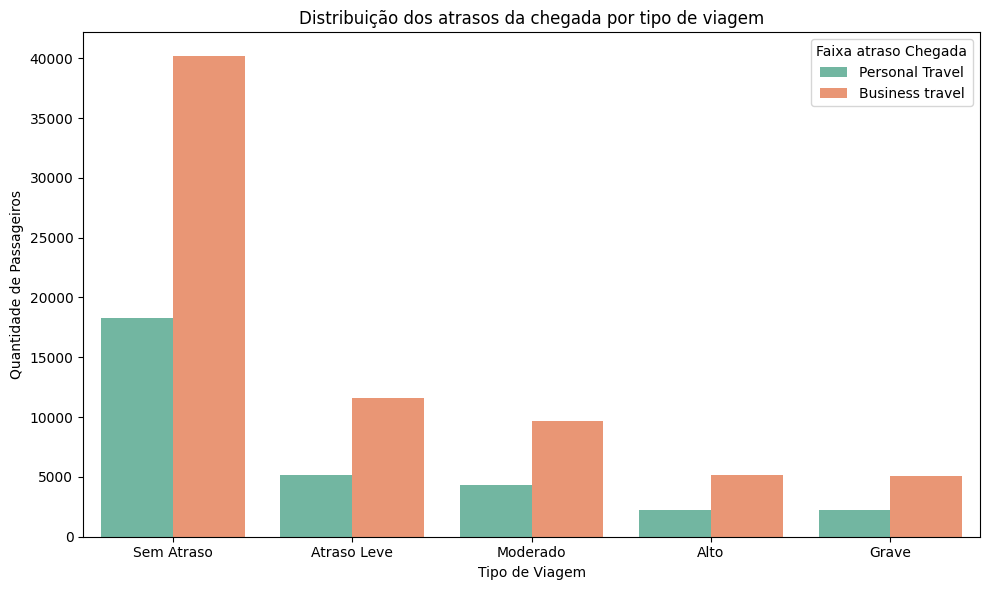

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Faixa_atraso_Chegada', hue = 'Tipo de Viagem', palette = 'Set2')
plt.title('Distribuição dos atrasos da chegada por tipo de viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Faixa atraso Chegada')
plt.tight_layout()
plt.show()

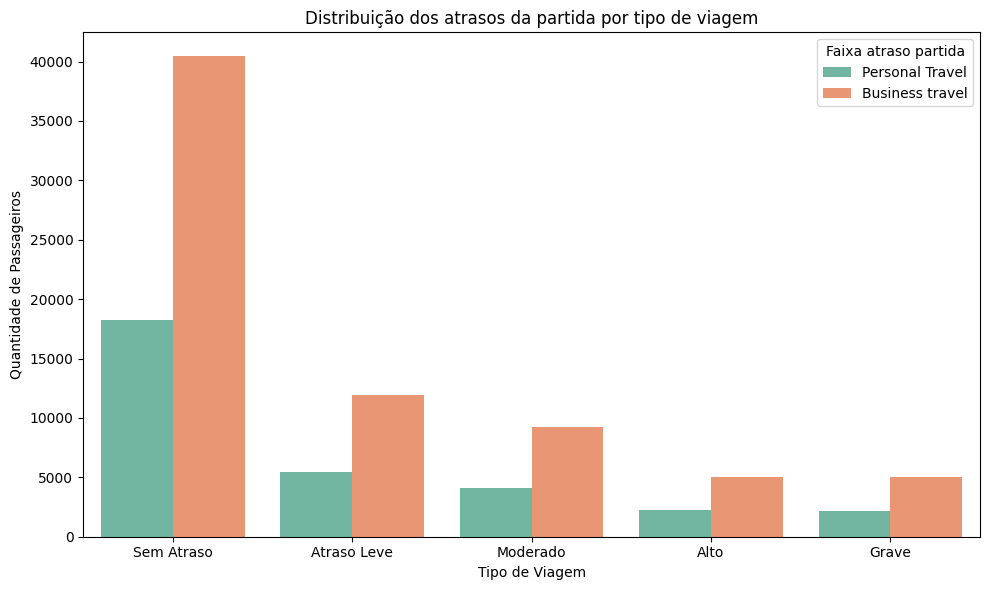

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x = 'Faixa_atraso_Partida', hue = 'Tipo de Viagem', palette = 'Set2')
plt.title('Distribuição dos atrasos da partida por tipo de viagem')
plt.xlabel('Tipo de Viagem')
plt.ylabel('Quantidade de Passageiros')
plt.legend(title = 'Faixa atraso partida')
plt.tight_layout()
plt.show()

De acodo com os 2 ultimos graficos apresentados, temo que:
- "Sem Atraso" lidera em ambas as categorias:
A faixa "Sem Atraso" apresenta a maior quantidade de passageiros tanto para viagens de negócios quanto pessoais, indicando que a maioria dos voos ocorre dentro do horário planejado, independentemente do tipo de viagem.

- Passageiros pessoais são mais impactados por atrasos moderados a graves:
Embora em menor volume total, a proporção de passageiros de viagens pessoais aumenta nas faixas de atraso mais elevadas. Isso pode indicar que clientes de voos pessoais são mais expostos a voos com atraso, possivelmente por voarem em horários ou rotas com menos prioridade operacional.

- Assim como ja foi citado: A maioria das observações em todas as faixas de atraso pertence ao tipo de viagem Business, o que reforça o perfil corporativo predominante da base de clientes da companhia aérea.

Text(0, 0.5, 'Quantidade de Passageiros')

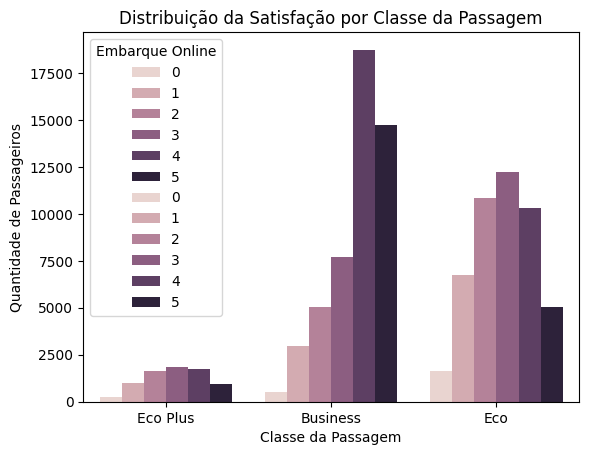

In [ ]:
sns.countplot(data=df, x= "Classe da Passagem", hue='Embarque Online')
plt.title('Distribuicao de qualificacao sobre o Embarque Online por Classe da Passagem')
plt.xlabel('Classe da Passagem')
plt.ylabel('Quantidade de Passageiros')

sns.countplot(data=df, x= "Classe da Passagem", hue='Embarque Online')
plt.title('Distribuição da Satisfação por Classe da Passagem')
plt.xlabel('Classe da Passagem')
plt.ylabel('Quantidade de Passageiros')

Com base no último gráfico, é perceptível que todas as classes de passagem demonstram um alto nível de satisfação com o processo de compra de ingressos pela internet. Esse comportamento indica que o canal digital está funcionando de forma eficiente e atende bem às expectativas dos passageiros.

Por outro lado, essa avaliação positiva reforça a necessidade de atenção especial aos pontos físicos de atendimento. Caso alguns passageiros ainda precisem utilizar o local para efetuar a compra presencialmente, é possível que estejam enfrentando dificuldades operacionais ou desconforto no ambiente físico, o que pode impactar negativamente a experiência geral da viagem.

Nesse contexto, torna-se estratégico investir na melhoria das condições e da usabilidade dos pontos presenciais de venda, ou mesmo estimular ainda mais o uso da plataforma online, que já se mostra bem avaliada entre todos os perfis de clientes.

## ✅ **Conclusão Geral da Análise Gráfica e Relacional**

A análise exploratória e gráfica dos dados permitiu identificar **relações significativas entre variáveis operacionais, comportamentais e de experiência**, que impactam diretamente a **satisfação dos passageiros**. Os principais pontos observados são:

---

### ✈️ **1. Atrasos são determinantes para a insatisfação, mas não isoladamente**

* A forte correlação entre **atraso na partida e na chegada (r = 0.96)** confirma que atrasos na decolagem comprometem o cumprimento do cronograma do voo.
* No entanto, mesmo entre passageiros que não enfrentaram atrasos, há um volume expressivo de avaliações **neutras ou negativas**, o que evidencia que **a pontualidade, embora fundamental, não é suficiente** para garantir a satisfação.

---

### 👥 **2. Perfil do passageiro influencia diretamente a percepção da experiência**

* Passageiros de **viagens a negócios** demonstram **níveis mais altos de satisfação**, o que pode estar associado a **benefícios operacionais, serviços premium e menor tolerância a falhas**.
* Já os passageiros em **viagens pessoais** concentram a maior parte das avaliações negativas, sendo mais afetados por atrasos **moderados e graves**, possivelmente por viajarem em rotas de menor prioridade operacional.

---

### 🛫 **3. Atrasos graves afetam a percepção de forma homogênea**

* Nas faixas de atraso **acima de 60 minutos**, a **satisfação cai drasticamente em ambos os contextos (chegada e partida)**. Esse padrão sugere que **há um limite de tolerância do passageiro**, ultrapassado o qual a experiência torna-se predominantemente negativa.
* Ainda assim, observa-se uma **minoria satisfeita mesmo em contextos críticos**, o que pode ser atribuído a **benefícios oferecidos em classes superiores**, como conforto, prioridade e atendimento diferenciado.

---

### 🎧 **4. Qualidade dos serviços a bordo impacta a satisfação**

* A correlação entre **“Serviço Durante o Voo” e “Serviço a Bordo” (r = 0.55)** evidencia que os passageiros percebem a experiência como um **conjunto integrado**, em que atendimento e serviços estão diretamente interligados.
* Itens como **conforto do assento**, **entretenimento** e **espaço para as pernas** apresentam correlação moderada com a satisfação, indicando que, embora não sejam determinantes isolados, **reforçam a experiência positiva** durante o voo.

---

### 🧾 **5. A experiência digital de compra é bem avaliada, mas o atendimento físico exige atenção**

* A avaliação positiva do **embarque online** por todas as classes de passagem demonstra que o canal digital atende de forma eficaz às expectativas do público.
* No entanto, essa aprovação acende um alerta sobre os **pontos físicos de atendimento**, onde passageiros que não utilizam o canal digital podem estar sendo expostos a **situações de desconforto**, comprometendo sua jornada.

---

### 📊 **6. Composição da base: clientes fiéis e voos pontuais predominam**

* A base da companhia aérea é majoritariamente composta por **clientes fiéis (“Loyal Customers”)**, o que demonstra sucesso em programas de fidelização.
* A maioria dos voos ocorre **sem atrasos**, mas os eventos de atraso, mesmo em menor volume, representam **os principais pontos de frustração na jornada**.

---

## 🧠 **Síntese estratégica**

> A satisfação do passageiro é resultado de múltiplos fatores interdependentes. Embora a pontualidade e o conforto sejam pilares centrais, a experiência é amplificada (positiva ou negativamente) por aspectos como atendimento, perfil do cliente e canais de interação com a companhia. Investir em **personalização do serviço**, **atenção ao público de viagens pessoais**, e **qualidade consistente em todos os pontos de contato** são caminhos estratégicos para elevar a percepção geral da experiência aérea.

## **Modelagem com Aprendizado de Máquina**

In [ ]:
df.shape
df.info()
df.describe(include='all')
df.isnull().sum()

# Remover colunas irrelevantes
df.drop(['ID Passageiro', 'Indice'], axis=1, inplace=True)

# Tratar valores nulos
df.dropna(inplace=True)

# Codificar variáveis categóricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Separar variáveis preditoras e alvo
X = df.drop('Satisfacao', axis=1)
y = df['Satisfacao']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Indice                                  103904 non-null  int64   
 1   ID Passageiro                           103904 non-null  int64   
 2   Genero                                  103904 non-null  object  
 3   Tipo de Cliente                         103904 non-null  object  
 4   Idade                                   103904 non-null  int64   
 5   Tipo de Viagem                          103904 non-null  object  
 6   Classe da Passagem                      103904 non-null  object  
 7   Distancia do Voo                        103904 non-null  int64   
 8   Wi-Fi a Bordo                           103904 non-null  int64   
 9   Horario Conveniente de Partida/Chegada  103904 non-null  int64   
 10  Facilidade na Reserva Online    

In [ ]:
# Copia o dataframe original
df_ml = df.copy()

# Remove colunas que não são úteis (se existirem)
for col in ['Unnamed: 0', 'Indice', 'ID Passageiro', 'id']:
    if col in df_ml.columns:
        df_ml.drop(col, axis=1, inplace=True)

# Remove linhas com valores nulos
df_ml.dropna(inplace=True)

# Aplica LabelEncoder em TODAS as colunas que têm strings
le = LabelEncoder()
for col in df_ml.columns:
    if df_ml[col].dtype == 'object':
        df_ml[col] = le.fit_transform(df_ml[col])

# Lista de colunas categóricas (visíveis na imagem)
colunas_categoricas = ['Faixa_atraso_Chegada', 'Faixa_atraso_Partida']

le = LabelEncoder()
for col in colunas_categoricas:
    df_ml[col] = le.fit_transform(df_ml[col])



# Verifica se agora todas são numéricas
print(df_ml.dtypes)

Genero                                      int64
Tipo de Cliente                             int64
Idade                                       int64
Tipo de Viagem                              int64
Classe da Passagem                          int64
Distancia do Voo                            int64
Wi-Fi a Bordo                               int64
Horario Conveniente de Partida/Chegada      int64
Facilidade na Reserva Online                int64
Localizacao do Portao                       int64
Comida e Bebida                             int64
Embarque Online                             int64
Conforto do Assento                         int64
Entretenimento a Bordo                      int64
Servico a Bordo                             int64
Espaco para as Pernas                       int64
Manuseio de Bagagem                         int64
Servico de Check-in                         int64
Servico Durante o Voo                       int64
Limpeza                                     int64


In [ ]:
# Separar preditores e alvo
X = df_ml.drop('Satisfacao', axis=1)
y = df_ml['Satisfacao']

# Separar treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # agora deve funcionar sem erro!

# Previsão
y_pred = model.predict(X_test)

# Avaliação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))

[[17178   377]
 [  838 12779]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.95     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172

Acurácia: 0.9610227126908765


### **Visualizacao do modelo Random Forest**

**Matriz de Confusão com heatmap**

É a forma mais comum para ver onde o modelo acertou e errou.

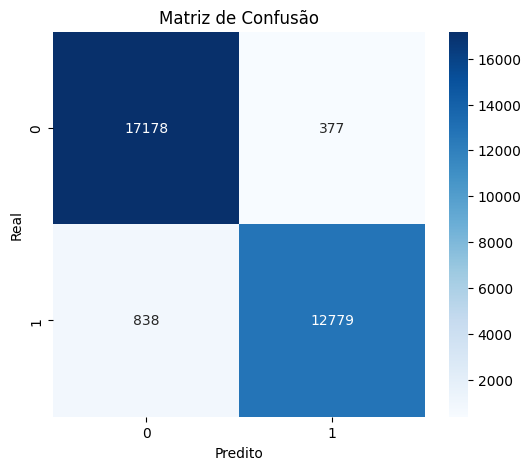

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

De acordo com o gráfico da matriz de confusão, o modelo apresentou um excelente desempenho na tarefa de classificação. Podemos observar que:

Foram corretamente classificados aproximadamente 17 mil exemplos da classe 0 (valores na célula [0,0] — canto superior esquerdo).

Foram corretamente classificados aproximadamente 12 mil exemplos da classe 1 (valores na célula [1,1] — canto inferior direito).

Isso indica que o modelo aprendeu bem a distinguir entre as duas classes, com a maior parte das previsões concentradas na diagonal principal da matriz, que representa as classificações corretas.

As células fora da diagonal (erros de classificação) apresentaram valores significativamente menores, o que reforça a eficácia do modelo. Portanto, o gráfico da matriz de confusão evidencia que o modelo tem alta acurácia e baixo índice de erro, tanto para a classe 0 quanto para a classe 1.

**Importância das features (variáveis preditoras)**

Visualize quais variáveis seu Random Forest considerou mais importantes para a predição.

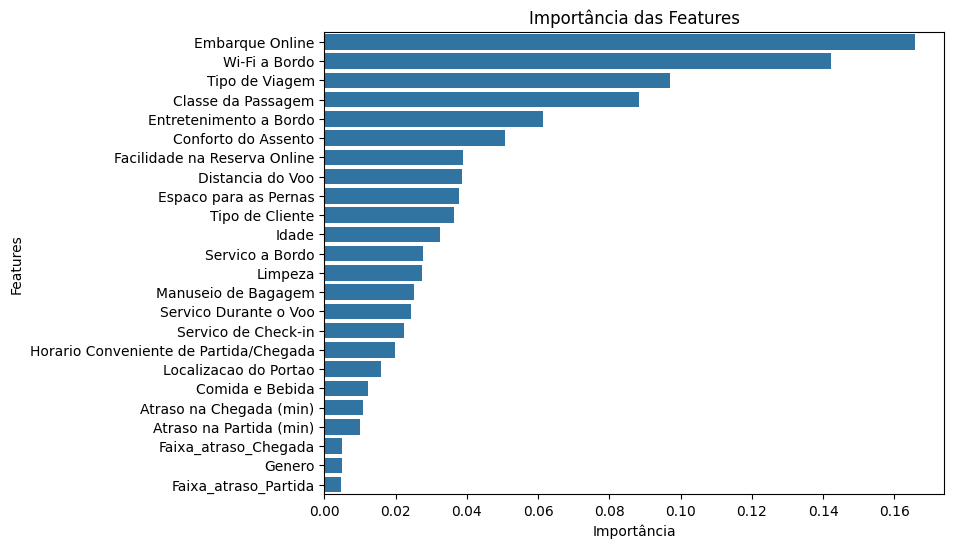

In [ ]:
importances = model.feature_importances_
features = X.columns

# Ordenar importâncias
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Importância das Features')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

De acordo com o grafico, temos que:

"Embarque Online" foi a variável mais importante, indicando forte influência da experiência digital na satisfação do cliente.

Outras variáveis relevantes: "Wi-Fi a Bordo", "Tipo de Viagem", "Classe da Passagem" e "Entretenimento a Bordo".

Variáveis como "Gênero", "Faixas de Atraso" e "Comida e Bebida" tiveram pouca ou nenhuma relevância.

O modelo mostra que fatores ligados à jornada digital e conforto explicam melhor a satisfação do que fatores operacionais ou pessoais.

**Curva ROC (para classificação binária)**

Visualizar a curva ROC para analisar o desempenho do modelo de forma binaria.

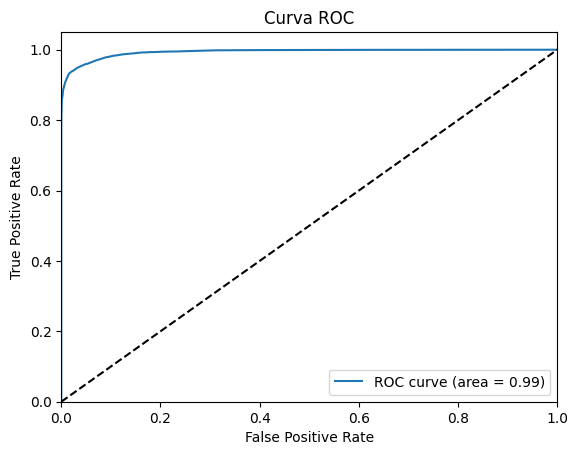

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Se o target tiver duas classes:
if len(y.unique()) == 2:
    y_test_bin = label_binarize(y_test, classes=[y.unique()[0], y.unique()[1]])
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # linha diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

Com esta visualizacao, percebemos que:

- A curva está bem próxima do canto superior esquerdo, o que indica alta taxa de verdadeiros positivos com baixa taxa de falsos positivos — ou seja, um ótimo desempenho.

- A AUC (Área sob a Curva) foi de 0.99, muito próxima de 1. Isso significa que o modelo tem excelente capacidade de distinguir entre as classes.